# Identifying Flags using Decision Trees

Setting up and interpreting the Data

In [1]:
# Mount the drive for file upload
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [5]:
directory = '/content/drive/MyDrive/Colab Notebooks/Codacademy Machine Learning/Decision Trees/Project/Flags.csv'
flags = pd.read_csv(directory, header = 0)

The possible columns are:

In [6]:
print(flags.columns)

Index(['Name', 'Landmass', 'Zone', 'Area', 'Population', 'Language',
       'Religion', 'Bars', 'Stripes', 'Colors', 'Red', 'Green', 'Blue', 'Gold',
       'White', 'Black', 'Orange', 'Mainhue', 'Circles', 'Crosses', 'Saltires',
       'Quarters', 'Sunstars', 'Crescent', 'Triangle', 'Icon', 'Animate',
       'Text', 'Topleft', 'Botright'],
      dtype='object')


The first five flags in the data are:

In [7]:
print(flags.head())

             Name  Landmass  Zone  Area  ...  Animate  Text  Topleft  Botright
0     Afghanistan         5     1   648  ...        0     0    black     green
1         Albania         3     1    29  ...        1     0      red       red
2         Algeria         4     1  2388  ...        0     0    green     white
3  American-Samoa         6     3     0  ...        1     0     blue       red
4         Andorra         3     1     0  ...        0     0     blue       red

[5 rows x 30 columns]


We will be building a decision tree to help us determine what Landmass a country is on. 

Note, we can choose the columns of a pandas dataframe via:


```
one_column = df[["A"]]
two_columns = df[["B", "C"]]
```



In our case, the labels will be the landmass of the country represented by each flag. We will isolate the labels via:

In [10]:
labels = flags[["Landmass"]]
print(labels)

     Landmass
0           5
1           3
2           4
3           6
4           3
..        ...
189         6
190         3
191         4
192         4
193         4

[194 rows x 1 columns]


For now, let's see if we can predict the landmass of a Country based on only the color of its flags. Thereby, the data we are training our Decision Tree on is:

In [12]:
data = flags[["Red","Green","Blue","Gold","White","Black","Orange"]]

In order to train the model and test it's accuracy, we should split the data into a training set and a test set using the built-in function:

In [14]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, random_state=1)

To ease our work, we will use scikit-learn's nifty bulit-in library and create a DecisionTreeClassifier:

In [16]:
tree = DecisionTreeClassifier(random_state=1)

We now fit the model:

In [17]:
tree.fit(train_data, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

Let's see our accuracy:

In [18]:
print(tree.score(test_data,test_labels))

0.3469387755102041


Since there are 6 landmasses in total, if we were to randomly guess, we'd have a probability of guessing the right landmass 16% of the time. Our model currently beats the baseline of guessing!

Yet, 34% accuracy seems a bit low, so let's tune the model and prune the tree.

Let's see how the accuracy changes as we vary the max_depth of the tree:

In [19]:
for i in range(1,21,1):
  train_data, test_data, train_labels, test_labels = train_test_split(data, labels, random_state=1)

  tree = DecisionTreeClassifier(random_state=1, max_depth = i)
  tree.fit(train_data, train_labels)
  print(tree.score(test_data,test_labels))

0.3469387755102041
0.22448979591836735
0.3469387755102041
0.32653061224489793
0.3469387755102041
0.3469387755102041
0.3469387755102041
0.3469387755102041
0.3469387755102041
0.3469387755102041
0.3469387755102041
0.3469387755102041
0.3469387755102041
0.3469387755102041
0.3469387755102041
0.3469387755102041
0.3469387755102041
0.3469387755102041
0.3469387755102041
0.3469387755102041


Rather than printing it out, let's graph it to see how the accuracy changes.

In [20]:
scores = []
for i in range(1,21,1):
  train_data, test_data, train_labels, test_labels = train_test_split(data, labels, random_state=1)

  tree = DecisionTreeClassifier(random_state=1, max_depth = i)
  tree.fit(train_data, train_labels)
  scores.append(tree.score(test_data,test_labels))

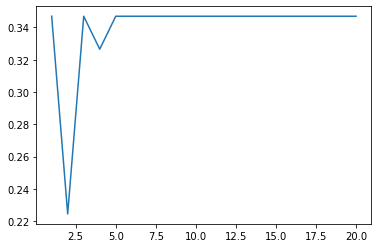

In [21]:
plt.plot(range(1,21),scores)
plt.show()

Our graph doesn’t really look like we would expect it to. It seems like the depth of the tree isn’t really having an impact on its performance. This might be a good indication that we’re not using enough features.

Let’s add all the features that have to do with shapes to our data. data should now be set equal to:


```
flags[["Red", "Green", "Blue", "Gold",
 "White", "Black", "Orange",
 "Circles",
"Crosses","Saltires","Quarters","Sunstars",
"Crescent","Triangle"]]
```



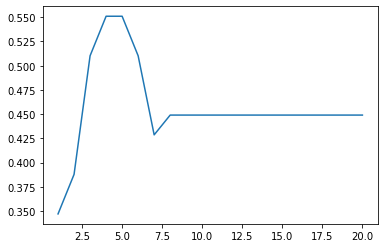

In [23]:
labels = flags[["Landmass"]]
new_data = flags[["Red", "Green", "Blue", "Gold",
 "White", "Black", "Orange",
 "Circles",
"Crosses","Saltires","Quarters","Sunstars",
"Crescent","Triangle"]]

scores = []
for i in range(1,21,1):
  train_data, test_data, train_labels, test_labels = train_test_split(new_data, labels, random_state=1)

  tree = DecisionTreeClassifier(random_state=1, max_depth = i)
  tree.fit(train_data, train_labels)
  scores.append(tree.score(test_data,test_labels))

plt.plot(range(1,21),scores)
plt.show()

We can see that with a smaller tree depth and with more features involved, the accuracy of our model improves. Perhaps we can play around with the features and see which ones further improves the accuracy of our model. 

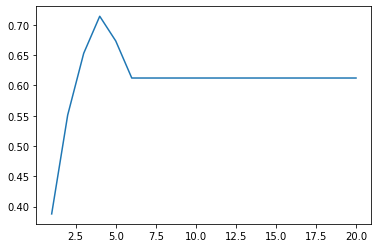

In [39]:
nes_data = flags[[ 'Zone', 'Area', 'Population', 'Language',
       'Religion', 'Bars', 'Stripes', 'Colors', 'Red', 'Green', 'Blue', 'Gold',
       'White', 'Black', 'Orange', 'Circles', 'Crosses', 'Saltires',
       'Quarters', 'Sunstars', 'Crescent', 'Triangle', 'Icon', 'Animate',
       'Text']]

labels = flags[["Landmass"]]

scores = []
for i in range(1,21,1):
  train_data, test_data, train_labels, test_labels = train_test_split(nes_data, labels, random_state=1)

  tree = DecisionTreeClassifier(random_state=1, max_depth = i)
  tree.fit(train_data, train_labels)
  scores.append(tree.score(test_data,test_labels))

plt.plot(range(1,21),scores)
plt.show()

We see that our model with new features used can achieve a test accuracy greater than 70%. This is good, but we can further improve the model perhaps by finding a better subset of features or tuning the hyperparameters of the model, like the number of max_leaf_nodes.

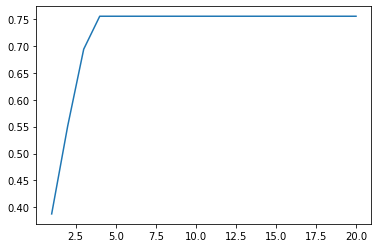

In [40]:
nes_data = flags[[ 'Zone', 'Area', 'Population', 'Language',
       'Religion', 'Bars', 'Stripes', 'Colors', 'Red', 'Green', 'Blue', 'Gold',
       'White', 'Black', 'Orange', 'Circles', 'Crosses', 'Saltires',
       'Quarters', 'Sunstars', 'Crescent', 'Triangle', 'Icon', 'Animate',
       'Text']]

labels = flags[["Landmass"]]

scores = []
for i in range(1,21,1):
  train_data, test_data, train_labels, test_labels = train_test_split(nes_data, labels, random_state=1)

  tree = DecisionTreeClassifier(random_state=1, max_depth = i, max_leaf_nodes=6)
  tree.fit(train_data, train_labels)
  scores.append(tree.score(test_data,test_labels))

plt.plot(range(1,21),scores)
plt.show()